In [92]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
# 2.) What deck were the passengers on and how does that relate to their class?
# 3.) Where did the passengers come from? (city)
# 4.) Who was alone and who was with family?
# 5.) What factors helped someone survive the sinking?
# 6.) Did the deck have an effect on the passengers survival rate? 
# 7.) Did having a family member increase the odds of surviving the 

In [94]:
# Titanic csv file
titanic_df = pd.read_csv('train.csv')

In [95]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
# Overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


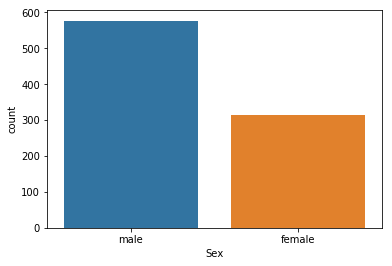

In [135]:
# Question1: Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

# Seperatoin of the gender
sns.countplot('Sex', data=titanic_df)

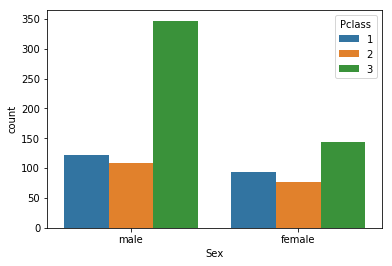

In [136]:
# Seperation of the genders by classes
sns.countplot('Sex', data=titanic_df, hue='Pclass')

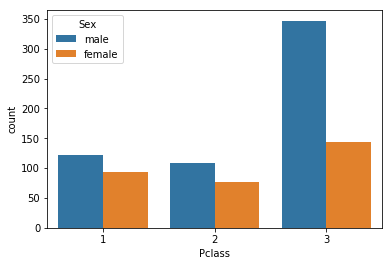

In [137]:
sns.countplot('Pclass', data=titanic_df, hue='Sex')

In [138]:
# Seperation of gender and adult/child 
# Def. child: Everybody under 16

In [139]:
# Define child and seperat from adults
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    

In [140]:
# Define a new column called 'person'
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [141]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


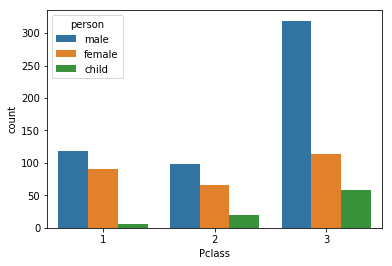

In [142]:
sns.countplot('Pclass', data=titanic_df, hue='person')

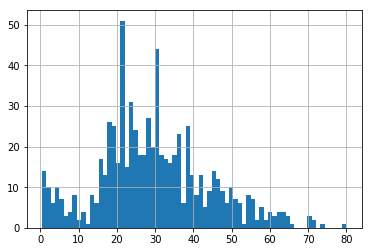

In [143]:
titanic_df['Age'].hist(bins=70)

In [144]:
titanic_df['Age'].mean()

29.69911764705882

In [145]:
# Overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

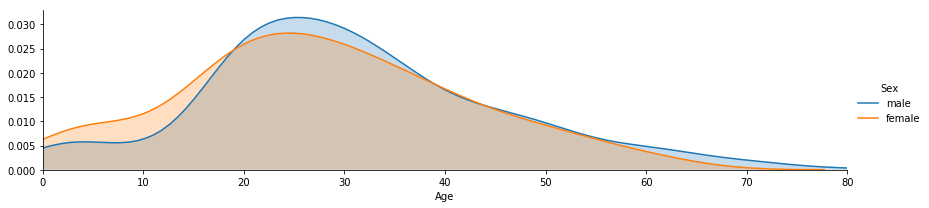

In [146]:
# Visualizaten of the date with FacetGrid

fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

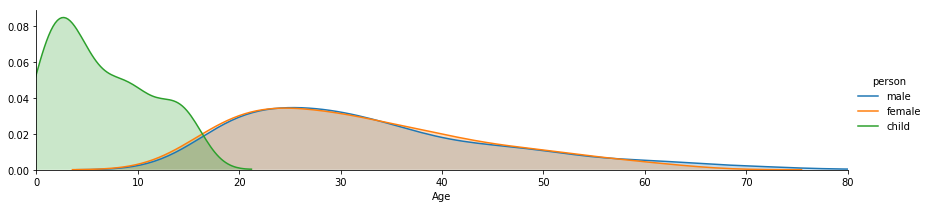

In [147]:
# Same for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

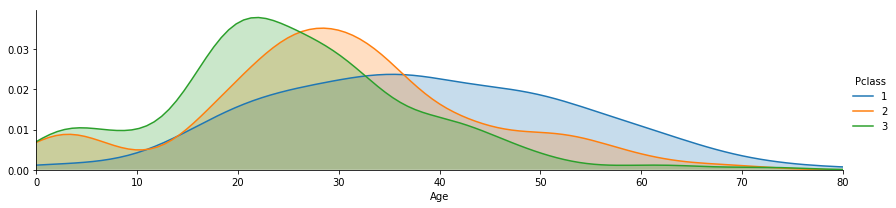

In [148]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [149]:
# Question2: What deck were the passengers on and how does that relate to their class?

# Drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [150]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

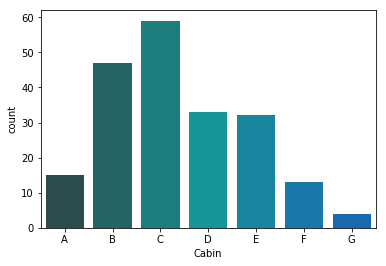

In [151]:
# Grab that letter for the deck level with a for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])
    
# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d', order=['A','B','C','D','E','F','G'])

In [152]:
# Question3: Where did the passengers come from?

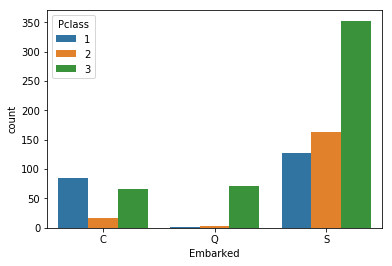

In [153]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=list('CQS'))

In [154]:
# Question4: Who was alone and who was with family?

# Add a new column and define alone
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [155]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


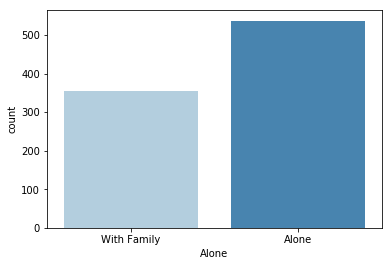

In [156]:
# Now let's get a simple visualization!
sns.countplot('Alone',data=titanic_df,palette='Blues')

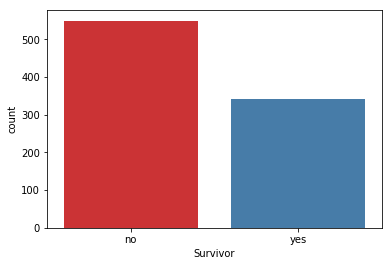

In [157]:
# Question5: What factors helped someone survive the sinking?

# Let's start by creating a new column for legibility purposes through mapping
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.countplot('Survivor',data=titanic_df,palette='Set1')

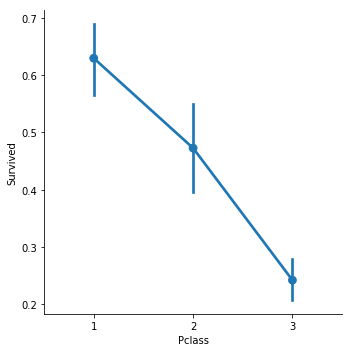

In [161]:
# What are the factors on the surviver rates?
sns.factorplot('Pclass','Survived',data=titanic_df)

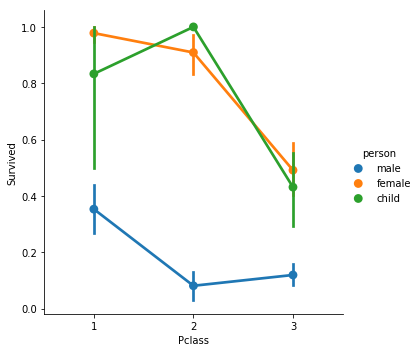

In [162]:
# considering class and gender
sns.factorplot('Pclass','Survived',hue = 'person', data=titanic_df)

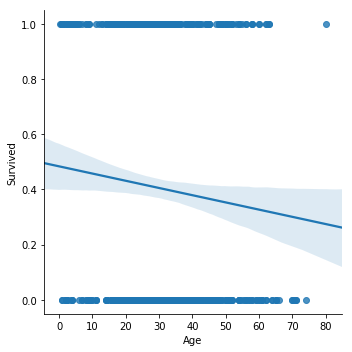

In [163]:
# Did being younger or older have an effect on survival rate?
sns.lmplot('Age','Survived',data=titanic_df)

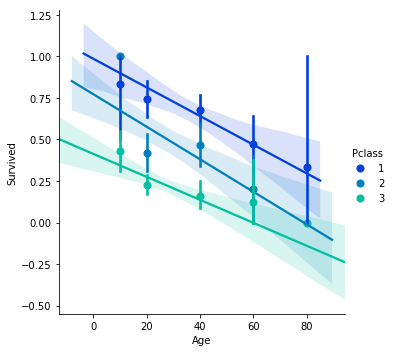

In [164]:
# Age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

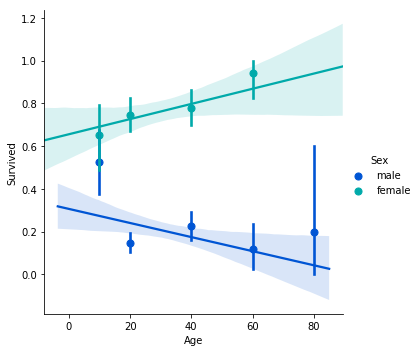

In [165]:
# What about if we relate gender and age with the survival set?
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

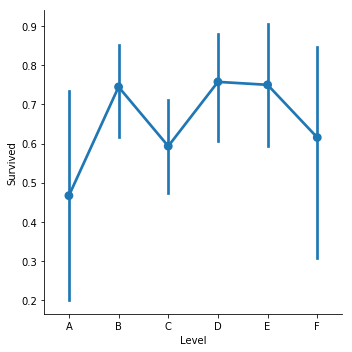

In [166]:
# Question 6: Did the deck have an effect on the passengers survival rate? 

titanic_df['Level'] = titanic_df['Cabin'].str[0]
sns.factorplot('Level','Survived',data=titanic_df,order=['A','B','C','D','E','F'])

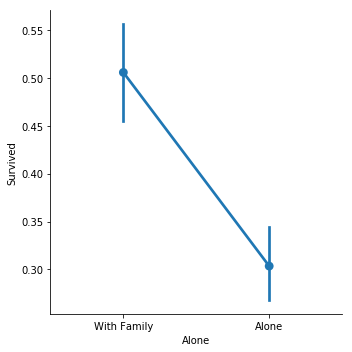

In [167]:
# Question7: Did having a family member increase the odds of surviving the crash?

sns.factorplot('Alone','Survived',data=titanic_df)